# Spirograph Patterns

Make a spirograph with some clever trig!

## Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### First Go

In [76]:
t0 = np.linspace(0, 2*np.pi, 50)
ti = np.linspace(0, 2*np.pi, 100)
r0 = 3
ri = 2

In [87]:
x0 = r0 * np.sin(t0)
y0 = 2 * r0 * np.cos(t0)

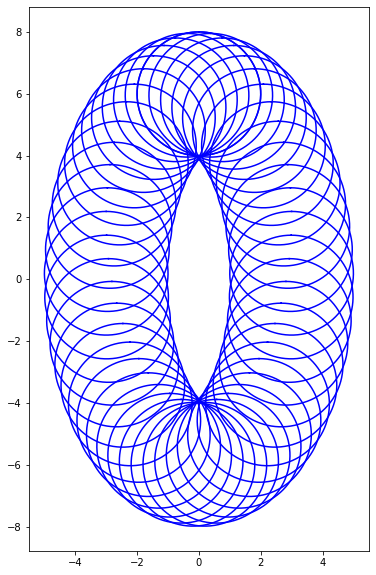

In [88]:
fig = plt.figure(figsize=(15, 10))

ax = plt.axes()
ax.set_aspect('equal')

# plt.plot(x0, y0, c='b')

for xi, yi in zip(x0, y0):
    xc = ri * np.sin(ti) + xi
    yc = ri * np.cos(ti) + yi
    plt.plot(xc, yc, c='b')

### Second Go

In [35]:
r_ring = 5
r_circle = 2
n_ring = 100
n_circle = 100
t_ring = np.linspace(0, 2*np.pi, n_ring*n_circle)
t_circle = np.linspace(0, 2*np.pi, n_circle)

In [36]:
x_ring = r_ring * np.sin(t_ring)
y_ring = r_ring * np.cos(t_ring)

In [37]:
xp = []
yp = []

for i in range(n_ring):
    for j in range(n_circle):
        xij = r_circle * np.sin(j) + x_ring[i+j]
        yij = r_circle * np.cos(j) + y_ring[i+j]
        xp.append(xij)
        yp.append(yij)

In [38]:
len(xp)

10000

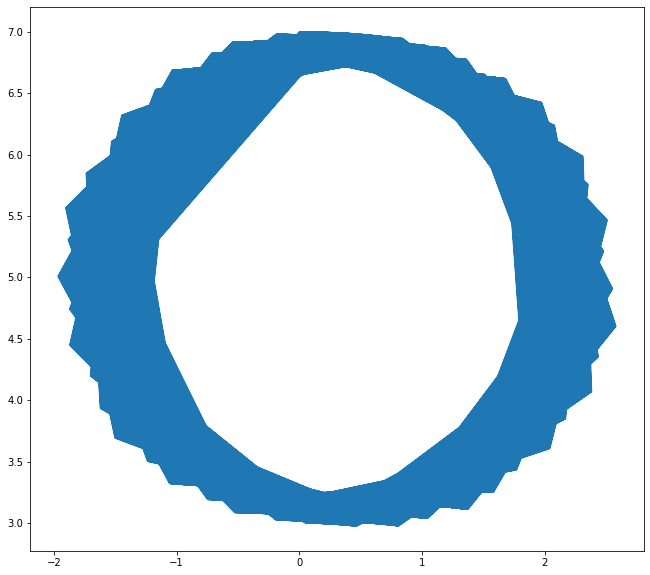

In [39]:
fig = plt.figure(figsize=(15, 10))

ax = plt.axes()
ax.set_aspect('equal')

plt.plot(xp, yp)

### Second go, but efficient

In [44]:
r_ring = 5
r_circle = 2
n_ring = 100
n_circle = 50
t_ring = np.linspace(0, 2*np.pi, n_ring*n_circle)
t_circle = np.linspace(0, 2*np.pi, n_circle)

In [45]:
x_ring = r_ring * np.sin(t_ring).reshape(n_ring, n_circle)
y_ring = r_ring * np.cos(t_ring).reshape(n_ring, n_circle)
x_circle = r_circle * np.sin(t_circle)
y_circle = r_circle * np.cos(t_circle)

xp = x_ring + x_circle
yp = y_ring + y_circle

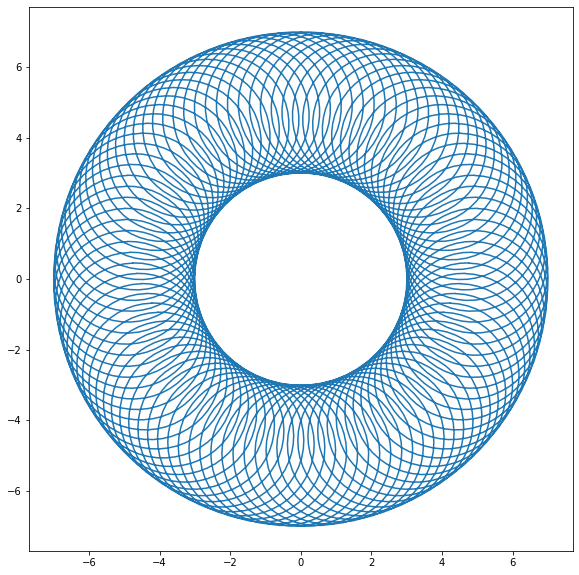

In [46]:
fig = plt.figure(figsize=(15, 10))

ax = plt.axes()
ax.set_aspect('equal')

plt.plot(xp.reshape(-1), yp.reshape(-1))

## HoloViz

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
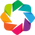

In [3]:
import holoviews as hv
import panel as pn

hv.extension('bokeh')

In [56]:
n = pn.widgets.IntSlider(name='n', start=10, end=100, step=1, value=16)
m = pn.widgets.IntSlider(name='m', start=5, end=100, step=1, value=50)
r0x = pn.widgets.FloatSlider(name='r0x', start=0.1, end=5.0, step=0.1, value=1.0)
r0y = pn.widgets.FloatSlider(name='r0y', start=0.5, end=3.0, step=0.1, value=1.0)
rix = pn.widgets.FloatSlider(name='rix', start=1.0, end=2.5, step=0.1, value=1.0)
riy = pn.widgets.FloatSlider(name='riy', start=1.0, end=3.0, step=0.1, value=1.0)

def make_points(n, m, r0x, r0y, rix, riy):
    t0 = np.linspace(0, 2*np.pi, n)
    ti = np.linspace(0, 2*np.pi, m)
    x0 = r0x * np.sin(t0)
    y0 = r0y * np.cos(t0)
    
    xout = []
    yout = []
    for xi, yi in zip(x0, y0):
        xc = rix * np.sin(ti) + xi
        xout.append(xc)
        yc = riy * np.cos(ti) + yi
        yout.append(yc)
        
    xres = np.concatenate(xout)
    yres = np.concatenate(yout)
    return xres, yres

@pn.depends(
    n.param.value, m.param.value,
    r0x.param.value, r0y.param.value,
    rix.param.value, riy.param.value,
)
def make_plot(n, m, r0x, r0y, rix, riy):
    x, y = make_points(n, m, r0x, r0y, rix, riy)
    return hv.Curve(zip(x, y)).opts(width=500, height=500)

pn.Row(pn.Column(n, m, r0x, r0y, rix, riy), make_plot)

Row
    [0] Column
        [0] IntSlider(end=100, name='n', start=10, value=16)
        [1] IntSlider(end=100, name='m', start=5, value=50)
        [2] FloatSlider(end=5.0, name='r0x', start=0.1, value=1.0)
        [3] FloatSlider(end=3.0, name='r0y', start=0.5, value=1.0)
        [4] FloatSlider(end=2.5, name='rix', start=1.0, value=1.0)
        [5] FloatSlider(end=3.0, name='riy', start=1.0, value=1.0)
    [1] ParamFunction(function)

In [4]:
n = pn.widgets.IntSlider(name='n', start=5, end=100, step=1, value=75)
m = pn.widgets.IntSlider(name='m', start=5, end=100, step=1, value=50)
rnx = pn.widgets.FloatSlider(name='rnx', start=0.1, end=5.0, step=0.1, value=4.0)
rny = pn.widgets.FloatSlider(name='rny', start=0.1, end=6.0, step=0.1, value=4.0)
rmx = pn.widgets.FloatSlider(name='rmx', start=0.5, end=3.0, step=0.1, value=2.0)
rmy = pn.widgets.FloatSlider(name='rmy', start=0.5, end=4.0, step=0.1, value=2.0)
kn = pn.widgets.FloatSlider(name='kn', start=0.1, end=5.0, step=0.1, value=1.0)
km = pn.widgets.FloatSlider(name='km', start=0.1, end=5.0, step=0.1, value=1.0)

def make_points(n, m, rnx, rny, rmx, rmy, kn, km):
    t_ring = np.linspace(0, 2*np.pi, n*m)
    t_circle = np.linspace(0, 2*np.pi, m)
    
    x_ring = rnx * np.sin(t_ring*kn).reshape(n, m)
    y_ring = rny * np.cos(t_ring*kn).reshape(n, m)
    xp = rmx * np.sin(t_circle*km) + x_ring
    yp = rmy * np.cos(t_circle*km) + y_ring

    return xp.reshape(-1), yp.reshape(-1)

@pn.depends(
    n.param.value, m.param.value,
    rnx.param.value, rny.param.value,
    rmx.param.value, rmy.param.value,
    kn.param.value, km.param.value
)
def make_plot(n, m, rnx, rny, rmx, rmy, kn, km):
    x, y = make_points(n, m, rnx, rny, rmx, rmy, kn, km)
    return hv.Curve(zip(x, y)).opts(width=750, height=750)

pn.Row(pn.Column(n, m, rnx, rny, rmx, rmy, kn, km), make_plot)

Row
    [0] Column
        [0] IntSlider(end=100, name='n', start=5, value=75)
        [1] IntSlider(end=100, name='m', start=5, value=50)
        [2] FloatSlider(end=5.0, name='rnx', start=0.1, value=4.0)
        [3] FloatSlider(end=6.0, name='rny', start=0.1, value=4.0)
        [4] FloatSlider(end=3.0, name='rmx', start=0.5, value=2.0)
        [5] FloatSlider(end=4.0, name='rmy', start=0.5, value=2.0)
        [6] FloatSlider(end=5.0, name='kn', start=0.1, value=1.0)
        [7] FloatSlider(end=5.0, name='km', start=0.1, value=1.0)
    [1] ParamFunction(function)